<a href="https://colab.research.google.com/github/monu322/CE888/blob/main/LAB4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC

import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [ ]:
user_ratings_df0 = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv")
user_ratings_df = user_ratings_df0
user_ratings_df.shape[0]

user_ratings_df.columns = list(range(user_ratings_df.shape[1]))

user_ratings_df = user_ratings_df.replace(99.00, np.nan)
user_ratings_df.drop([0], axis='columns', inplace=True)
print(user_ratings_df0)
print(user_ratings_df)

print('Rating by user 804 for joke 12: ', user_ratings_df.iloc[804, 12])


       0      1      2      3      4    ...    96     97     98     99     100
0      100   4.08  -0.29   6.36   4.37  ...  -2.14   3.06   0.34  -4.32   1.07
1       49  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
2       48  99.00   8.35  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
3       91   8.50   4.61  -4.17  -5.39  ...   1.55   3.11   6.55   1.80   1.60
4      100  -6.17  -3.54   0.44  -8.50  ...  -3.35   0.05  -9.08  -5.05  -3.45
...    ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
24977  100   0.44   7.43   9.08   2.33  ...   9.03   6.55   8.69   8.79   7.43
24978   91   9.13  -8.16   8.59   9.08  ...  -8.20  -7.23  -8.59   9.13   8.45
24979   39  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
24980   37  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
24981   72   2.43   2.67  -3.98   4.27  ...  99.00  99.00  99.00  99.00  99.00

[24982 rows x 101 columns]
        1     2     3   

In [ ]:
#code to find best and worst jokes

column_sums = []

for i in range(user_ratings_df.shape[1]):

  column_values = user_ratings_df[i+1].tolist()
  column_values = [column_values for column_values in column_values if str(column_values) != 'nan']
  column_values = np.array(column_values)

  column_sums.append(column_values.sum()/len(column_values))

minpos = column_sums.index(min(column_sums))
maxpos = column_sums.index(max(column_sums))

print("The worst joke is", minpos + 1) 
print("The best joke is", maxpos + 1) 

The worst joke is 58
The best joke is 50


In [ ]:
n_latent_factors = 2

user_ratings = user_ratings_df.values

print(user_ratings.shape)
print(user_ratings)

# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

print('latent_user_preferences shape: ', latent_user_preferences.shape)
print('latent_item_features shape', latent_item_features.shape)

(24982, 100)
[[ 4.08 -0.29  6.36 ...  0.34 -4.32  1.07]
 [  nan   nan   nan ...   nan   nan   nan]
 [  nan  8.35   nan ...   nan   nan   nan]
 ...
 [  nan   nan   nan ...   nan   nan   nan]
 [  nan   nan   nan ...   nan   nan   nan]
 [ 2.43  2.67 -3.98 ...   nan   nan   nan]]
latent_user_preferences shape:  (24982, 2)
latent_item_features shape (100, 2)


In [ ]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 2) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

In [ ]:
num_iter = 30
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations


KeyboardInterrupt: ignored

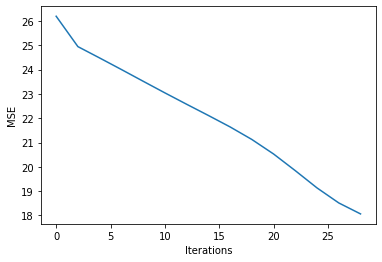

In [ ]:
plt.figure()
plt.plot(np.arange(0, num_iter, 2), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [ ]:
predictions = latent_user_preferences.dot(latent_item_features.T)
print('predictions shape: ', predictions.shape)
print(predictions)

predictions shape:  (24982, 100)
[[ 5.947e+00  6.272e+00  7.640e+00 ...  1.773e+01  1.788e+01  1.843e+01]
 [ 3.279e+01  3.279e+01  4.005e+01 ...  8.702e+01  8.575e+01  9.024e+01]
 [ 2.472e+01  2.494e+01  3.044e+01 ...  6.689e+01  6.619e+01  6.940e+01]
 ...
 [ 2.877e-01  1.567e-01  1.992e-01 ... -2.148e-02 -1.871e-01 -4.123e-02]
 [ 3.478e+00  2.366e+00  2.955e+00 ...  2.563e+00  1.117e+00  2.497e+00]
 [ 1.223e+01  1.101e+01  1.352e+01 ...  2.515e+01  2.324e+01  2.590e+01]]


In [ ]:
import math

def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """

  nan = np.nan

  orig[np.isnan(orig)] = 99

  print('changed orig: ', orig)

  new_data = orig.copy()
  rated = np.where(new_data!=99)
  print('Rated: ',rated)
  n_rated = len(rated[0])
  print('', n_rated)
  index = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  #print('idx: ',idx)
  new_data[rated[0][index], rated[1][index]] = 66
  return new_data, (rated[0][index], rated[1][index])

arr = user_ratings_df.values
#print('data values: ', arr)

validation_set = replace(arr)
print('Validations set :', validation_set)
#print('Val set shape : ', validation_set.shape)

original set : [[ 1.  2. 33.  4. 33.]
 [ 6. 99.  8. 99. 10.]
 [nan 12. 13. nan 15.]]
changed orig:  [[ 4.08 -0.29  6.36 ...  0.34 -4.32  1.07]
 [99.   99.   99.   ... 99.   99.   99.  ]
 [99.    8.35 99.   ... 99.   99.   99.  ]
 ...
 [99.   99.   99.   ... 99.   99.   99.  ]
 [99.   99.   99.   ... 99.   99.   99.  ]
 [ 2.43  2.67 -3.98 ... 99.   99.   99.  ]]
Rated:  (array([    0,     0,     0, ..., 24981, 24981, 24981]), array([ 0,  1,  2, ..., 69, 70, 86]))
 1810381
Validations set : (array([[ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
       [99.  ,  8.35, 99.  , ..., 99.  , 99.  , 99.  ],
       ...,
       [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
       [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
       [ 2.43,  2.67, -3.98, ..., 99.  , 99.  , 99.  ]]), (array([15198,  8115, 22129, ..., 20331, 20210,  2508]), array([84, 46, 42, ..., 48, 19, 14])))


In [ ]:
orig = user_ratings_df.values
val_set = validation_set[0]

#MSE calculation of validation set

nn_count = 0
errors = []
predicts = []
origs = []

for user_id in range(val_set.shape[0]):
  for item_id in range(val_set.shape[1]):
      if val_set[user_id][item_id]==66:
        err = orig[user_id][item_id] - predictions[user_id][item_id]
        origs.append(orig[user_id][item_id])
        predicts.append(predictions[user_id][item_id])
        errors.append(err)



print(origs[:2000])
print(predicts[:2000])
print(errors[:2000])

print('Number of ratings: ',len(origs))
print('Number of ratings1: ',len(predicts))

total = val_set.shape[0]*val_set.shape[1]

print('total Number of ratings: ',total)

print('Val %:', len(predicts)/total)

mse = (np.array(errors) ** 2).mean()

print('MSE: ', mse)

[-0.97, -1.21, 0.05, -0.92, 0.73, -1.46, -1.31, -6.5, -3.2, -3.83, -5.0, 2.77, 7.77, 7.33, 6.07, 4.56, 2.82, 7.28, 8.98, 6.17, 8.16, 7.33, 0.63, 0.53, -1.17, 2.48, 6.8, 2.48, 0.19, -8.06, 3.93, -7.09, -1.8, -5.73, -7.04, -3.2, -7.91, -6.99, -7.28, -6.94, -0.68, -9.08, 1.55, 8.5, 2.43, 9.17, -1.7, -0.44, -6.46, 4.17, -2.14, 2.48, -9.81, 0.49, -7.86, -9.13, -3.35, -6.99, -1.6, -0.29, 0.97, 4.42, -5.29, 4.85, -2.04, 0.78, -0.29, -0.29, -3.4, 6.02, 6.02, 6.5, 7.67, 5.73, 3.11, 1.41, 8.64, -1.8, -2.04, 0.63, -1.36, 2.33, -6.89, -0.24, 0.15, 3.06, 0.58, 5.44, 3.98, 3.98, 4.85, 7.04, 7.82, -9.13, 9.03, 7.23, 7.43, 8.06, 8.79, 8.2, 2.09, 8.11, -1.02, -7.91, -5.05, -8.01, -9.51, 3.79, 2.57, -7.04, -5.49, -2.96, 4.9, -3.83, 0.63, 5.39, -3.54, -4.51, -3.64, -0.39, -4.22, 6.21, -2.28, -0.87, 0.63, 0.44, -4.13, -1.89, 8.3, 5.24, -6.12, -1.02, 0.53, 2.52, 6.5, 0.83, 5.49, 2.62, 7.86, 7.48, -0.05, 0.49, 0.97, 0.68, 1.8, 2.23, 0.24, 3.25, 2.38, -3.16, 3.25, -9.95, 0.29, -6.5, 3.98, 1.31, 2.67, -0.53, 